## Feature Selection using FeatureSelector.

## We used a Feature_selection tool which is trending on medium (https://towardsdatascience.com/a-feature-selection-tool-for-machine-learning-in-python-b64dd23710f0)

## It eliminates the ad-hoc feature selection methods. We dowloaded the feature_selector.py and kept it under supporting_methods in the repo.


In [3]:
import pandas as pd
from sklearn.model_selection import cross_val_score
import os
from feature_selector import FeatureSelector
import numpy as np

In [4]:
game_data=pd.read_csv('final_scrapped_data.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (36,39,45,48,52,53,63,158,161,167,170,174,175,186) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
game_data.reset_index(inplace=True)

In [6]:
features_list_extended=['home_CF','home_CA','home_CF%','home_FF','home_FA','home_FF%','home_SF','home_SA','home_SF%','home_GF','home_GA',
               'home_GF%','home_xGF','home_xGA','home_xGF%','home_HDCF%','home_HDSF%','home_HDGF%','home_HDSH%','home_HDSV%','home_MDSA',
               'home_MDSF%','home_MDGF','home_MDGA','home_MDGF%','home_MDSH%','home_MDSV%','home_LDCF%','home_LDSF','home_LDSA','home_LDSF%',
               'home_LDGF','home_LDGF%','home_LDSV%','home_PDO','home_xGF_pp','home_GF_pp','home_xGA_pk','home_GA_pk',
               'guest_CF','guest_CA','guest_CF%','guest_FF','guest_FA','guest_FF%','guest_SF','guest_SA','guest_SF%','guest_GF','guest_GA',
               'guest_GF%','guest_xGF','guest_xGA','guest_xGF%','guest_HDCF%','guest_HDSF%','guest_HDGF%','guest_HDSH%','guest_HDSV%','guest_MDSA',
               'guest_MDSF%','guest_MDGF','guest_MDGA','guest_MDGF%','guest_MDSH%','guest_MDSV%','guest_LDCF%','guest_LDSF','guest_LDSA','guest_LDSF%',
               'guest_LDGF','guest_LDGF%','guest_LDSV%','guest_xGF_pp','guest_GF_pp','guest_xGA_pk','guest_GA_pk']

### Selecting all the features for 40 and 5 rolling games seperately.

### We seperated the features into 40 and 5 rolling game average beacause NHL is a low scoring game and the data has a lot of varience. To smoothen out the varience we calculated 40 and 5 rolling game average for each feature.

In [7]:
all_features=['match_BacktoBack','home_fwkSV%_GoalKeeper','home_GSAx/60_GoalKeeper','home_HDCSV%__GoalKeeper','guest_fwkSV%_GoalKeeper','guest_GSAx/60_GoalKeeper','guest_HDCSV%__GoalKeeper','home_team_label','away_team_label',
              'home_SCF','home_SCA','home_SCF%','home_HDCF','home_HDCA','home_HDSF','home_HDSA','home_HDGF','home_HDGA','home_MDCF','home_MDCA','home_MDCF%','home_MDSF','home_LDCF','home_LDCA',
              'home_SH%','home_SV%','home_LDSH%','home_LDGA','guest_SCF','guest_SCA','guest_SCF%','guest_HDCF','guest_HDCA','guest_HDSF','guest_HDSA','guest_HDGF','guest_HDGA','guest_MDCF','guest_MDCA','guest_MDCF%','guest_MDSF','guest_LDCF','guest_LDCA',
              'guest_SH%','guest_SV%','guest_LDSH%','guest_LDGA']+features_list_extended
moving_features_5 =[
'home_Fenwick%_SVA_TeamMoingAverage_5',
'home_GF%_SVA_TeamMoingAverage_5',
'home_xGF%_SVA_TeamMoingAverage_5',
'home_SFGF%_SVA_TeamMoingAverage_5',
'home_xGF_Average_pp_TeamMoingAverage_5',
'home_GF_Average_Average_pp_TeamMoingAverage_5',
'home_xGA_Average_pk_TeamMoingAverage_5',
'home_GA_Average_Average_pk_TeamMoingAverage_5',
'guest_Fenwick%_SVA_TeamMoingAverage_5',
'guest_GF%_SVA_TeamMoingAverage_5',
'guest_xGF%_SVA_TeamMoingAverage_5',
'guest_SFGF%_SVA_TeamMoingAverage_5',
'guest_xGF_Average_pp_TeamMoingAverage_5',
'guest_GF_Average_Average_pp_TeamMoingAverage_5',
'guest_xGA_Average_pk_TeamMoingAverage_5',
'guest_GA_Average_Average_pk_TeamMoingAverage_5',
'home_CA_SVA_TeamMoingAverage_5',
'guest_CA_SVA_TeamMoingAverage_5',
'home_FF_SVA_TeamMoingAverage_5',
'home_FA_SVA_TeamMoingAverage_5',
'home_SA_SVA_TeamMoingAverage_5',
'home_GA_SVA_TeamMoingAverage_5',
'home_GF_SVA_TeamMoingAverage_5',
'home_xGA_SVA_TeamMoingAverage_5',
'home_xGF_SVA_TeamMoingAverage_5',
'home_GF_pp_TeamMoingAverage_5',
'home_xGF_pp_TeamMoingAverage_5',
'home_GF_Average_Average_pp_TeamMoingAverage_5',
'home_xGF_Average_pp_TeamMoingAverage_5',
'home_GA_pk_TeamMoingAverage_5',
'home_xGA_pk_TeamMoingAverage_5',
'guest_FF_SVA_TeamMoingAverage_5',
'guest_FA_SVA_TeamMoingAverage_5',
'guest_SF_SVA_TeamMoingAverage_5',
'guest_SA_SVA_TeamMoingAverage_5',
'guest_GA_SVA_TeamMoingAverage_5',
'guest_GF_SVA_TeamMoingAverage_5',
'guest_xGA_SVA_TeamMoingAverage_5',
'guest_xGF_SVA_TeamMoingAverage_5',
'guest_GF_pp_TeamMoingAverage_5',
'guest_xGF_pp_TeamMoingAverage_5',
'guest_TOI_Average_pp_TeamMoingAverage_5',
'guest_TOI_pk_TeamMoingAverage_5',
'guest_GA_pk_TeamMoingAverage_5',
'guest_xGA_pk_TeamMoingAverage_5']+all_features

moving_features_40 =[
'home_Fenwick%_SVA_TeamMoingAverage_40',
'home_GF%_SVA_TeamMoingAverage_40',
'home_xGF%_SVA_TeamMoingAverage_40',
'home_SFGF%_SVA_TeamMoingAverage_40',
'home_xGF_Average_pp_TeamMoingAverage_40',
'home_GF_Average_Average_pp_TeamMoingAverage_40',
'home_xGA_Average_pk_TeamMoingAverage_40',
'home_GA_Average_Average_pk_TeamMoingAverage_40',
'guest_Fenwick%_SVA_TeamMoingAverage_40',
'guest_GF%_SVA_TeamMoingAverage_40',
'guest_xGF%_SVA_TeamMoingAverage_40',
'guest_SFGF%_SVA_TeamMoingAverage_40',
'guest_xGF_Average_pp_TeamMoingAverage_40',
'guest_GF_Average_Average_pp_TeamMoingAverage_40',
'guest_xGA_Average_pk_TeamMoingAverage_40',
'guest_GA_Average_Average_pk_TeamMoingAverage_40',
'home_CA_SVA_TeamMoingAverage_40',
'guest_CA_SVA_TeamMoingAverage_40',
'home_FF_SVA_TeamMoingAverage_40',
'home_FA_SVA_TeamMoingAverage_40',
'home_SF_SVA_TeamMoingAverage_40',
'home_SA_SVA_TeamMoingAverage_40',
'home_GA_SVA_TeamMoingAverage_40',
'home_GF_SVA_TeamMoingAverage_40',
'home_xGA_SVA_TeamMoingAverage_40',
'home_xGF_SVA_TeamMoingAverage_40',
'home_GF_pp_TeamMoingAverage_40',
'home_xGF_pp_TeamMoingAverage_40',
'home_GF_Average_Average_pp_TeamMoingAverage_40',
'home_xGF_Average_pp_TeamMoingAverage_40',
'home_GA_pk_TeamMoingAverage_40',
'home_xGA_pk_TeamMoingAverage_40',
'guest_FF_SVA_TeamMoingAverage_40',
'guest_FA_SVA_TeamMoingAverage_40',
'guest_SF_SVA_TeamMoingAverage_40',
'guest_SA_SVA_TeamMoingAverage_40',
'guest_GA_SVA_TeamMoingAverage_40',
'guest_GF_SVA_TeamMoingAverage_40',
'guest_xGA_SVA_TeamMoingAverage_40',
'guest_xGF_SVA_TeamMoingAverage_40',
'guest_GF_pp_TeamMoingAverage_40',
'guest_xGF_pp_TeamMoingAverage_40',
'guest_TOI_Average_pp_TeamMoingAverage_40',
'guest_TOI_pk_TeamMoingAverage_40',
'guest_GA_pk_TeamMoingAverage_40',
'guest_xGA_pk_TeamMoingAverage_40']+all_features


In [8]:
moving_features_40=list(set(moving_features_40))

In [9]:
moving_features_5=list(set(moving_features_5))

In [10]:
game_data_selected_40=game_data[moving_features_40]

In [11]:
game_data_selected_5=game_data[moving_features_5]

### Creating a feature_selector instance.

In [12]:
label_selection_40=FeatureSelector(data=game_data_selected_40,labels=moving_features_40)

In [13]:
label_selection_5=FeatureSelector(data=game_data_selected_5,labels=moving_features_5)

### Features with a lot of missing values. We have taken a threshold of 30%.

In [14]:
label_selection_40.identify_missing(missing_threshold=0.3)

0 features with greater than 0.30 missing values.



In [15]:
label_selection_5.identify_missing(missing_threshold=0.3)

0 features with greater than 0.30 missing values.



### Looks like no feature has a lot of missing values.

### Filtering features that are highly correlated with each other.

In [16]:
label_selection_40.identify_collinear(correlation_threshold=0.98)

67 features with a correlation magnitude greater than 0.98.



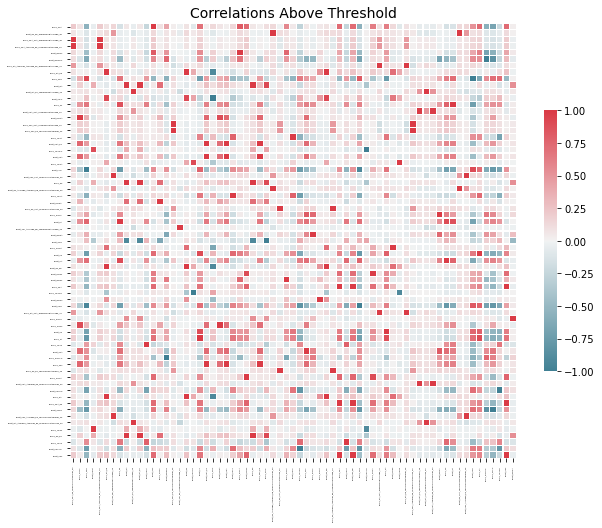

In [17]:
label_selection_40.plot_collinear()

In [18]:
collinear_features_40=label_selection_40.ops['collinear']

### Listing features with a that have 98% correlated with each other.

In [19]:
collinear_features_40

['home_xGA_Average_pk_TeamMoingAverage_40',
 'guest_MDCA',
 'home_xGA_pk_TeamMoingAverage_40',
 'home_GA_pk',
 'guest_LDSA',
 'home_SV%',
 'guest_GF_Average_Average_pp_TeamMoingAverage_40',
 'home_CF%',
 'home_GA_SVA_TeamMoingAverage_40',
 'home_GA_pk_TeamMoingAverage_40',
 'guest_xGA_Average_pk_TeamMoingAverage_40',
 'home_CF',
 'guest_GF_SVA_TeamMoingAverage_40',
 'home_SCF%',
 'guest_xGF',
 'home_HDCF',
 'home_HDGF',
 'guest_TOI_pk_TeamMoingAverage_40',
 'guest_LDSH%',
 'guest_FF',
 'home_MDCA',
 'home_GF',
 'home_SH%',
 'home_MDSA',
 'home_LDCF%',
 'home_SCF',
 'guest_GF_pp',
 'home_xGA',
 'guest_LDCA',
 'guest_xGF_pp',
 'home_HDSA',
 'guest_HDGF',
 'guest_SA',
 'guest_xGF_Average_pp_TeamMoingAverage_40',
 'guest_SF%',
 'home_CA',
 'home_MDCF%',
 'home_FF%',
 'guest_LDGA',
 'guest_xGF_pp_TeamMoingAverage_40',
 'home_FF',
 'guest_GA',
 'guest_GA_pk_TeamMoingAverage_40',
 'guest_GA_pk',
 'guest_SCF',
 'guest_MDSF%',
 'home_xGF_pp_TeamMoingAverage_40',
 'guest_GF',
 'guest_xGA_pk',
 '

In [20]:
label_selection_5.identify_collinear(correlation_threshold=0.98)

67 features with a correlation magnitude greater than 0.98.



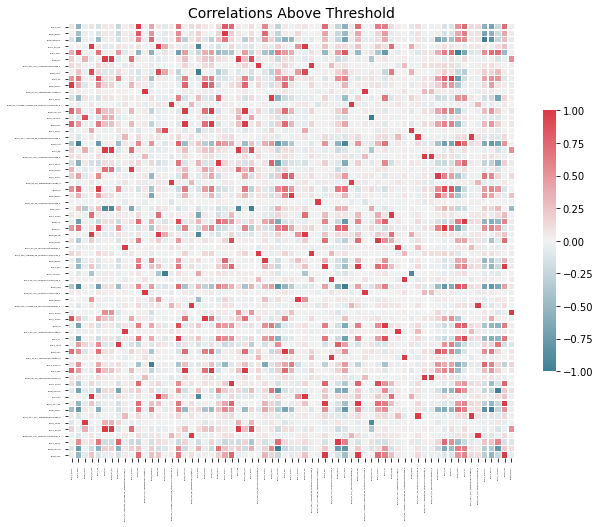

In [21]:
label_selection_5.plot_collinear()

In [22]:
collinear_features_5=label_selection_5.ops['collinear']

### Listing features with a that have 98% correlated with each other.

In [23]:
collinear_features_5

['guest_xGA_pk_TeamMoingAverage_5',
 'guest_MDCA',
 'home_GA_pk',
 'guest_LDSA',
 'guest_GF_Average_Average_pp_TeamMoingAverage_5',
 'home_SV%',
 'home_xGF_Average_pp_TeamMoingAverage_5',
 'guest_GF_SVA_TeamMoingAverage_5',
 'home_CF%',
 'guest_xGA_Average_pk_TeamMoingAverage_5',
 'home_CF',
 'guest_xGF_SVA_TeamMoingAverage_5',
 'home_SCF%',
 'guest_xGF',
 'home_HDCF',
 'home_HDGF',
 'guest_GA_pk_TeamMoingAverage_5',
 'guest_LDSH%',
 'guest_FF',
 'home_MDCA',
 'home_GF',
 'home_SH%',
 'home_xGF_pp_TeamMoingAverage_5',
 'home_MDSA',
 'home_LDCF%',
 'home_SCF',
 'guest_GF_pp',
 'home_xGA',
 'home_GF_SVA_TeamMoingAverage_5',
 'guest_LDCA',
 'guest_xGF_pp',
 'home_HDSA',
 'guest_HDGF',
 'home_GA_SVA_TeamMoingAverage_5',
 'home_GF_Average_Average_pp_TeamMoingAverage_5',
 'guest_SA',
 'guest_SF%',
 'home_CA',
 'home_xGA_SVA_TeamMoingAverage_5',
 'home_MDCF%',
 'home_FF%',
 'guest_LDGA',
 'home_FF',
 'guest_GA',
 'guest_GA_pk',
 'home_GA_Average_Average_pk_TeamMoingAverage_5',
 'guest_SCF',
 

### Remove any columns that have a single unique value which is of no use to the machine learning.

In [ ]:
label_selection_40.identify_single_unique()

0 features with a single unique value.



In [ ]:
label_selection_5.identify_single_unique()

0 features with a single unique value.



### We have identified the features to select.

In [ ]:
selected_features_40=[x for x in moving_features_40 if (x not in collinear_features_40)]

In [ ]:
selected_features_5=[x for x in moving_features_5 if (x not in collinear_features_5)]

In [ ]:
len(selected_features_40)

101

In [ ]:
len(selected_features_5)

100

### Saving final feature list.

In [ ]:
pd.DataFrame(selected_features_40).to_csv('selected_features_40.csv')

In [ ]:
pd.DataFrame(selected_features_5).to_csv('selected_features_5.csv')

### As we said on We seperated the features into 40 and 5 rolling game average beacause NHL is a low scoring game and the data has a lot of varience. To smoothen out the varience we calculated 40 and 5 rolling game average for each feature.

### And to keep the window larger so that we can include every opponent a team might face in an tournament, we are going to use 40 game rolling average for the prediction modelling.